# Coursework 1: Convolutional Neural Networks 
### Autograding
Part 1 of this coursework is autograded. This notebook comes with embedded tests which will verify that your implementations provide outputs with the appropriate types and shapes required for our hidden tests. You can run these same public tests through [LabTS](https://teaching.doc.ic.ac.uk/labts) when you have finished your work, to check that we get the same results when running these public tests.

Hidden tests will be ran after the submission deadline, and cannot be accessed :)

### Setting up working environment 

For this coursework you will need to train a large network, therefore we recommend you work with Google Colaboratory or Paperspace, where you can access GPUs.

You should receive an email at your imperial address inviting you to join the course team on PaperSpace (within a day of the coursework being released).

#### Paperspace
See [the Paperspace information doc](https://hackmd.io/@afspies/S1stL8Qnt). 

The public tests are embedded within the notebook. You can ignore the "tests" folder as it is only required for colab.


#### Google Colab
To run this notebook on Google Colab, please log in to your account and go to the following page: https://colab.research.google.com. Then upload this notebook.

For GPU support, go to "Edit" -> "Notebook Settings", and select "Hardware accelerator" as "GPU".

**To run the public tests within colab** you will need to copy the "tests" folder to the /content/ directory (this is the default working directory - you can also change directories with %cd). You may also need to place a copy of the CW ipynb in the /content/ directory. A better option is to mount colab on gdrive and keep the files there (so you only need to do the set up once).

#### Setup
You will need to install pytorch and other libraries by running the following cell:

In [70]:
!pip install -q otter-grader pandoc torch torchvision sklearn seaborn

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.21.12 which is incompatible.


In [1]:
# Initialization Cell
import otter
grader = otter.Notebook("dl_cw_1.ipynb")
import matplotlib.pyplot as plt # DO NOT use %matplotlib inline in the notebook
import numpy as np
rng_seed = 90

## Introduction
In this courswork you will explore various deep learning functionalities through implementing a number of pytorch neural network operations/layers and creating your own deep learning model and methodology for a high dimensional classification problem.

#### Intended learning outcomes
- An understanding of the mechanics behind convolutional, pooling, linear and batch norm operations. 
- Be able to implement convolution, pooling, linear and batch norm layers from basic building blocks.
- Experience designing, implementing and optimising a classifier for a high dimensional dataset.

## Part 1 (50 points)

In this part, you will use basic Pytorch operations to define the 2D convolution, 2D max pooling, linear layer, as well as 2D batch normalization operations. Being computer scientists we care about efficiency, we therefore do not want to see any _for loops_!

**Your Task**
- Implement the forward pass for Conv2D (15 points), MaxPool2D (15 points), Linear (5 points) and BatchNorm2d (15 points)
- You are **NOT** allowed to use the torch.nn modules (The one exception is that the class inherits from nn.Module)

_hint: check out F.unfold and F.fold, they may be helpful_

In [93]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

class Conv2d(nn.Module):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride=1,
                 padding=0,
                 bias=True):

        super(Conv2d, self).__init__()
        """
        An implementation of a convolutional layer.

        The input consists of N data points, each with C channels, height H and
        width W. We convolve each input with F different filters, where each filter
        spans all C channels and has height H' and width W'.

        Parameters:
        - w: Filter weights of shape (F, C, H', W',)
        - b: Biases of shape (F,)
        - kernel_size: Union[int, (int, int)], Size of the convolving kernel
        - stride: Union[int, (int, int)], Number of pixels between adjacent receptive fields in the
            horizontal and vertical directions.
        - padding: Union[int, (int, int)], Number of pixels that will be used to zero-pad the input.
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Define the parameters used in the forward pass
        ...
        # Do not initialize weights or biases with torch.empty() but rather use torch.zeros()
        # Weights should have shape [out_channels, in_channels, kernel_x, kernel_y]
        if(isinstance(kernel_size, int)):
            self.w = torch.zeros(out_channels, in_channels, kernel_size, kernel_size)
        else:
            self.w = torch.zeros(out_channels, in_channels, kernel_size[0], kernel_size[1])
        # Bias should have shape [out_channels] 
        self.b = torch.zeros(out_channels)
        self.F = out_channels
        self.C = in_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.bias = bias
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, F, H', W').
        """
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # TODO: Implement the forward pass  
        # Unfold the input into columns corresponding to required patches.
        unfolded_input = F.unfold(x, kernel_size=self.kernel_size, stride=self.stride, padding=self.padding)
        # Multiply the columns with weights for convolution.
        output = unfolded_input.transpose(1,2).matmul(self.w.view(self.F, -1).t()).transpose(1,2)
        # Add bias if required.
        if(self.bias):
            output += self.b.view(-1, 1)
        # Assign the correct dimensions to parameters corresponding to int or tuple.
        if(isinstance(self.kernel_size, tuple)):
            kernel_height, kernel_width = self.kernel_size
        else:
            kernel_height = kernel_width = self.kernel_size
        if(isinstance(self.stride, tuple)):
            stride_height, stride_width = self.stride
        else:
            stride_height = stride_width = self.stride
        if(isinstance(self.padding, tuple)):
            padding_height, padding_width = self.padding
        else:
            padding_height = padding_width = self.padding
        # Calculate the output shape.
        out_shape = (int((x.shape[2] + 2*padding_height - kernel_height)/stride_height + 1), int((x.shape[3] + 2*padding_width - kernel_width)/stride_width + 1))
        # Fold the output into the required shape.
        out = F.fold(output, output_size=out_shape, kernel_size=(1,1))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [94]:
grader.check("Convolution Layer")

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

In [95]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MaxPool2d(nn.Module):
    def __init__(self, kernel_size):
        super(MaxPool2d, self).__init__()
        """
        An implementation of a max-pooling layer.

        Parameters:
        - kernel_size: Union[int, (int, int)], the size of the window to take a max over
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.kernel_size = kernel_size
        self.stride = kernel_size
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data, of shape (N, C, H', W').
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        channels = x.shape[1]
        # Unfold the input into columns corresponding to required patches.
        unfolded_input = F.unfold(x, kernel_size=self.kernel_size, stride=self.stride)
        if(isinstance(self.kernel_size, tuple)):
            kernel_height, kernel_width = self.kernel_size
        else:
            kernel_height = kernel_width = self.kernel_size
        # Fold the input into channels.
        unfolded_channels = F.fold(unfolded_input, output_size=(int(unfolded_input.shape[1]/channels),int(unfolded_input.shape[2])), kernel_size=(kernel_height*kernel_width,1))
        # Fins max value of each column in the channel.
        unfolded_maxxed = unfolded_channels.max(dim=2)[0]
        # Calculate the output shape.
        out_shape = (x.shape[2]//kernel_height, x.shape[3]//kernel_width)
        # Fold the output into the required shape.
        out = F.fold(unfolded_maxxed, output_size=out_shape, kernel_size=(1,1))
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [96]:
grader.check("MaxPool Layer")

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed

In [97]:
class Linear(nn.Module):
    def __init__(self, in_channels, out_channels, bias=True):
        super(Linear, self).__init__()
        """
        An implementation of a Linear layer.

        Parameters:
        - weight: the learnable weights of the module of shape (in_channels, out_channels).
        - bias: the learnable bias of the module of shape (out_channels).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        # Also no initialisation methods for this reason
        self.w = torch.zeros((in_channels, out_channels))
        self.b = torch.zeros((out_channels))
        self.bias = bias
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        Input:
        - x: Input data of shape (N, *, H) where * means any number of additional
        dimensions and H = in_channels
        Output:
        - out: Output data of shape (N, *, H') where * means any number of additional
        dimensions and H' = out_channels
        """
        # TODO: Implement the forward pass                                     #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        # Multiply the input with weights for linear layer.
        out = torch.matmul(x, self.w)
        # Add bias if required.
        if(self.bias):
            out += self.b
        
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [101]:
grader.check("Linear Layer")

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

In [134]:
class BatchNorm2d(nn.Module):
    def __init__(self, num_features, eps=1e-05, momentum=0.1):
        super(BatchNorm2d, self).__init__()
        """
        An implementation of a Batch Normalization over a mini-batch of 2D inputs.

        The mean and standard-deviation are calculated per-dimension over the
        mini-batches and gamma and beta are learnable parameter vectors of
        size num_features.

        Parameters:
        - num_features: C from an expected input of size (N, C, H, W).
        - eps: a value added to the denominator for numerical stability. Default: 1e-5
        - momentum: the value used for the running_mean and running_var
        computation. Default: 0.1 . (i.e. 1-momentum for running mean)
        - gamma: the learnable weights of shape (num_features).
        - beta: the learnable bias of the module of shape (num_features).
        """
        # TODO: Define the parameters used in the forward pass                 #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        self.num_features = num_features
        self.eps = eps
        self.momentum = momentum
        self.running_mean = torch.zeros((num_features))
        self.running_var = torch.zeros((num_features))

        # self.register_parameter is not used as it was mentioned on piazza
        # that this will be overridden
        self.gamma = torch.ones((num_features), requires_grad=True)
        self.beta = torch.zeros((num_features), requires_grad=True)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    def forward(self, x):
        """
        During training this layer keeps running estimates of its computed mean and
        variance, which are then used for normalization during evaluation.
        Input:
        - x: Input data of shape (N, C, H, W)
        Output:
        - out: Output data of shape (N, C, H, W) (same shape as input)
        """
        # TODO: Implement the forward pass                                     #
        #       (be aware of the difference for training and testing)          #
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        if(self.training):
            # Calculate the mean and variance for each channel.
            means = x.mean(dim=(0,2,3), keepdim=True)
            variances = x.var(unbiased=False, dim=(0,2,3), keepdim=True)
            unbiased_variances = x.var(unbiased=True, dim=(0,2,3), keepdim=True)
            # Normalise the input.
            normalised_input = (x - means) / torch.sqrt(variances + self.eps)

            # Update the running mean and variance.
            squished_means = means.squeeze(3).squeeze(2).squeeze(0)
            squished_variances = unbiased_variances.squeeze(3).squeeze(2).squeeze(0)
            self.running_mean = self.momentum*squished_means + (1-self.momentum)*self.running_mean
            self.running_var = self.momentum*squished_variances + (1-self.momentum)*self.running_var
        else:
            # Normalise the input using the running mean and variance.
            normalised_input = (x - self.running_mean.unsqueeze(0).unsqueeze(2).unsqueeze(3)) / torch.sqrt(self.running_var.unsqueeze(0).unsqueeze(2).unsqueeze(3) + self.eps)
        # Shift the normalised input using gamma and beta.
        shifted_input = self.gamma.unsqueeze(0).unsqueeze(2).unsqueeze(3)*normalised_input + self.beta.unsqueeze(0).unsqueeze(2).unsqueeze(3)
        out = shifted_input

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return out

In [138]:
grader.check("BatchNorm Layer")

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

: 

## Part 2 (40 points)

In this part, you will design, train and optimise a custom deep learning model for classifying a specially selected subset of Imagenet. Termed NaturalImageNet, it is made up of a hand selected subset of the famous ImageNet dataset. The dataset contains 20 classes, all animals from the natural world. We hope that this dataset will be fun to work with but also a challenge.

You will be marked on your experimental process, methods implemented and your reasoning behind your decisions. While there will be marks for exceeding a baseline performance score we stress that students should **NOT** spend excessive amounts of time optimising performance to silly levels.

We have given you some starter code, please feel free to use and adapt it.

**Your Task**
1. Develop/adapt a deep learning pipeline to maximise performance on the test set. (30 points)
    * 10 points will be awarded for improving on the baseline score on the test set. Don't worry you can get full marks here by improving by a minor amount.
    * 20 points will be awarded for the adaptations made to the baseline model and pipeline.

2. Answer the qualititative questions (10 points)

**Downloading NaturalImageNet**

In [76]:
ON_COLAB = False

!wget https://zenodo.org/record/5846979/files/NaturalImageNetTest.zip?download=1
!wget https://zenodo.org/record/5846979/files/NaturalImageNetTrain.zip?download=1
if ON_COLAB:
    !unzip /content/NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip /content/NaturalImageNetTrain.zip?download=1 > /dev/null
else: 
    !unzip NaturalImageNetTest.zip?download=1 > /dev/null
    !unzip NaturalImageNetTrain.zip?download=1 > /dev/null

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
The system cannot find the path specified.


In [136]:
#torch
import torch
from torch.nn import Conv2d, MaxPool2d
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
#other
import matplotlib.pyplot as plt
import numpy as np
# set the seed for reproducibility
rng_seed = 90
torch.manual_seed(rng_seed)

In [138]:
# When we import the images we want to first convert them to a tensor. 
# It is also common in deep learning to normalise the the inputs. This 
# helps with stability.
# To read more about this subject this article is a great one:
# https://towardsdatascience.com/understand-data-normalization-in-machine-learning-8ff3062101f0

# transforms is a useful pytorch package which contains a range of functions
# for preprocessing data, for example applying data augmentation to images 
# (random rotations, blurring the image, randomly cropping the image). To find out
# more please refer to the pytorch documentation:
# https://pytorch.org/docs/stable/torchvision/transforms.html
ON_COLAB = False

mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])
transform = transforms.Compose(
        [
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )


# Lists of augmentations to apply to the images.
augmentations2 = [transforms.RandomResizedCrop(256, scale=(0.2,0.75))]
augmentations3 = [transforms.RandomHorizontalFlip(1.0), transforms.RandomRotation([10,45])]

# Perform random rezised crop augmentation.
transform2 = transforms.Compose(
        [
            transforms.RandomChoice(augmentations2),
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )

# Perform random horizontal flip or random rotation augmentations.
transform3 = transforms.Compose(
        [
            transforms.RandomChoice(augmentations3),
            transforms.Resize(256),
            transforms.CenterCrop(256),
            transforms.ToTensor(),
            transforms.Normalize(mean.tolist(), std.tolist()),
        ]
    )


train_path = ('/content/' if ON_COLAB else '') + 'NaturalImageNetTrain'
test_path = ('/content/' if ON_COLAB else '') +'NaturalImageNetTest'

# Createdataset with non augmented images.
train_dataset1 = datasets.ImageFolder(train_path, transform=transform)

# Create datasets with augmented images.
train_dataset2 = datasets.ImageFolder(train_path, transform=transform2)

train_dataset3 = datasets.ImageFolder(train_path, transform=transform3)

test_dataset = datasets.ImageFolder(test_path, transform=transform)

# Create train val split
n = len(train_dataset1)
n_val = int(n/10)

# Split all three into the same train and val sets.
train_set1, val_set1 = torch.utils.data.random_split(train_dataset1, [n-n_val, n_val], generator=torch.Generator().manual_seed(42))
train_set2, val_set2 = torch.utils.data.random_split(train_dataset2, [n-n_val, n_val], generator=torch.Generator().manual_seed(42))
train_set3, val_set3 = torch.utils.data.random_split(train_dataset3, [n-n_val, n_val], generator=torch.Generator().manual_seed(42))

# Create full train set by concatenating the three datasets.
train_set = torch.utils.data.ConcatDataset([train_set1, train_set2, train_set3])
# Use validation set with no augmentations.
val_set = val_set1


print(len(train_set), len(val_set), len(test_dataset))


# The number of images to process in one go. If you run out of GPU
# memory reduce this number!
batch_sizes = [16, 32, 64, 128]
# Reduced to 16.
batch_size = batch_sizes[0]

# Dataloaders are a great pytorch functionality for feeding data into our AI models.
# see https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader
# for more info.

loader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_val = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)
loader_test = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

53958 1998 2000


In [139]:
unnormalize = transforms.Normalize((-mean / std).tolist(), (1.0 / std).tolist())

def denorm(x):
    '''
    Function to reverse the normalization so that we can visualise the outputs
    '''
    x = unnormalize(x)
    x = x.view(x.size(0), 3, 256, 256)
    return x

def show(img):
    '''
    function to visualise tensors
    '''
    if torch.cuda.is_available():
        img = img.cpu()
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)).clip(0, 1))

**Visualising some example images** 

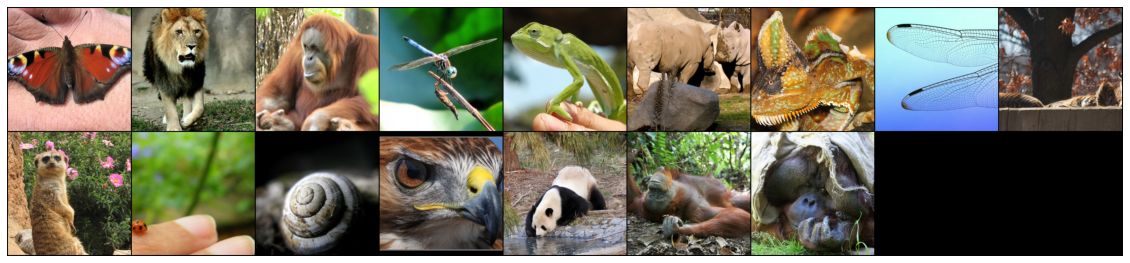

In [140]:
sample_inputs, _ = next(iter(loader_val))
fixed_input = sample_inputs[:27, :, :, :]

img = make_grid(denorm(fixed_input), nrow=9, padding=2, normalize=False,
                value_range=None, scale_each=False, pad_value=0)
plt.figure(figsize=(20,10))
plt.axis('off')
show(img)

Next, we define ResNet-18:

In [141]:
# define resnet building blocks

class ResidualBlock(nn.Module): 
    def __init__(self, inchannel, outchannel, stride=1): 
        
        super(ResidualBlock, self).__init__() 
        
        self.left = nn.Sequential(Conv2d(inchannel, outchannel, kernel_size=3, 
                                         stride=stride, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel), 
                                  nn.ReLU(inplace=True), 
                                  Conv2d(outchannel, outchannel, kernel_size=3, 
                                         stride=1, padding=1, bias=False), 
                                  nn.BatchNorm2d(outchannel)
                                  ) 
        
        self.shortcut = nn.Sequential() 
        
        if stride != 1 or inchannel != outchannel: 
            
            self.shortcut = nn.Sequential(Conv2d(inchannel, outchannel, 
                                                 kernel_size=1, stride=stride, 
                                                 padding = 0, bias=False), 
                                          nn.BatchNorm2d(outchannel) ) 
        
            
    def forward(self, x): 
        
        out = self.left(x) 
        
        out += self.shortcut(x)
        
        out = F.relu(out) 
        
        return out


    
# define resnet

class ResNet(nn.Module):
    
    def __init__(self, ResidualBlock, num_classes = 20):
        
        super(ResNet, self).__init__()
        
        self.inchannel = 64
        self.conv1 = nn.Sequential(Conv2d(3, 64, kernel_size = 3, stride = 1,
                                            padding = 1, bias = False), 
                                  nn.BatchNorm2d(64), 
                                  nn.ReLU())
        
        #self.layer1 = self.make_layer(ResidualBlock, 16, 2, stride = 2)
        #self.layer2 = self.make_layer(ResidualBlock, 32, 2, stride = 2)
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride = 2)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride = 2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride = 2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride = 2)
        self.maxpool = MaxPool2d(4)
        self.avgpool = nn.AvgPool2d(4)
        self.fc = nn.Linear(512, num_classes)

        
    
    def make_layer(self, block, channels, num_blocks, stride):
        
        strides = [stride] + [1] * (num_blocks - 1)
        
        layers = []
        
        for stride in strides:
            
            layers.append(block(self.inchannel, channels, stride))
            
            self.inchannel = channels
            
        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        
        x = self.conv1(x)
        #x = self.layer1(x)
        #x = self.layer2(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x
    
# please do not change the name of this class
def MyResNet():
    return ResNet(ResidualBlock)

In [142]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def confusion(preds, y):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # Plotting the confusion matrix
  cm = confusion_matrix(y.cpu().numpy(), preds.cpu().numpy(), normalize='true')
  fig, ax= plt.subplots(1, 1, figsize=(15,10))
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels(labels, rotation = 70); ax.yaxis.set_ticklabels(labels, rotation=0);
  plt.show()

def incorrect_preds(preds, y, test_img):
  labels = ['African Elephant', 'Kingfisher', 'Deer','Brown Bear', 'Chameleon', 'Dragonfly',
    'Giant Panda', 'Gorilla', 'Hawk', 'King Penguin', 'Koala', 'Ladybug', 'Lion',
    'Meerkat', 'Orangutan', 'Peacock', 'Red Fox', 'Snail', 'Tiger', 'White Rhino']
  # lets see a sample of the images which were classified incorrectly!
  correct = (preds == y).float()
  test_labels_check = correct.cpu().numpy()
  incorrect_indexes = np.where(test_labels_check == 0)

  test_img = test_img.cpu()
  samples = make_grid(denorm(test_img[incorrect_indexes][:9]), nrow=3,
                      padding=2, normalize=False, value_range=None, 
                      scale_each=False, pad_value=0)
  plt.figure(figsize = (20,10))
  plt.title('Incorrectly Classified Instances')
  show(samples)
  labels = np.asarray(labels)
  print('Predicted label',labels[preds[incorrect_indexes].cpu().numpy()[:9]])
  print('True label', labels[y[incorrect_indexes].cpu().numpy()[:9]])
  print('Corresponding images are shown below')

In [143]:
USE_GPU = True
dtype = torch.float32 


if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print(device)
    

print_every = 10
info_every = 250
def check_accuracy(loader, model, analysis=False):
    # function for test accuracy on validation and test set
    
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode

    # For analysis.
    predictions = torch.tensor([], device=device)
    targets = torch.tensor([], device=device)

    with torch.no_grad():
        for t, (x, y) in enumerate(loader):
            x = x.to(device=device, dtype=dtype)  # move to device
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            predictions = torch.cat((predictions, preds), dim=0)
            targets = torch.cat((targets, y), dim=0)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
            if t == 0 and analysis:
              stack_labels = y
              stack_predicts = preds
            elif analysis:
              stack_labels = torch.cat([stack_labels, y], 0)
              stack_predicts = torch.cat([stack_predicts, preds], 0)
        acc = float(num_correct) / num_samples
        print('Got %d / %d correct of val set (%.2f)' % (num_correct, num_samples, 100 * acc))
        if analysis:
          print('check acc', type(stack_predicts), type(stack_labels))
          confusion(stack_predicts, stack_labels)
          incorrect_preds(preds, y, x)
        return float(acc), predictions, targets

        

def train_part(model, optimizer, scheduler, epochs=1, info=False):
    """
    Train a model on NaturalImageNet using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """

    val_accuracies = []
    losses = []

    model = model.to(device=device)  # move the model parameters to CPU/GPU
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            scores = model(x)
            loss = F.cross_entropy(scores, y)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            loss.backward()

            # Update the parameters of the model using the gradients
            optimizer.step()

            if(info and t % info_every == 0):
                #Save accuracy and loss for plotting.
                acc, _, _ = check_accuracy(loader_val, model)
                val_accuracies.append(acc)
                losses.append(loss.item())
            if t % print_every == 0:
                print('Epoch: %d, Iteration %d, loss = %.4f' % (e, t, loss.item()))
        # Added learning rate scheduler.
        scheduler.step()
        check_accuracy(loader_val, model)
    return val_accuracies, losses
                

cuda:0


Total number of parameters is: 11183316
Epoch: 0, Iteration 0, loss = 2.9879
Epoch: 0, Iteration 10, loss = 3.0365
Epoch: 0, Iteration 20, loss = 3.1548
Epoch: 0, Iteration 30, loss = 2.9676
Epoch: 0, Iteration 40, loss = 2.9600
Epoch: 0, Iteration 50, loss = 2.6846
Epoch: 0, Iteration 60, loss = 2.6871
Epoch: 0, Iteration 70, loss = 2.9121
Epoch: 0, Iteration 80, loss = 2.6165
Epoch: 0, Iteration 90, loss = 2.3354
Epoch: 0, Iteration 100, loss = 2.7793
Epoch: 0, Iteration 110, loss = 2.7714
Epoch: 0, Iteration 120, loss = 2.2353
Epoch: 0, Iteration 130, loss = 2.5874
Epoch: 0, Iteration 140, loss = 2.0764
Epoch: 0, Iteration 150, loss = 2.0504
Epoch: 0, Iteration 160, loss = 2.2325
Epoch: 0, Iteration 170, loss = 2.0791
Epoch: 0, Iteration 180, loss = 1.8693
Epoch: 0, Iteration 190, loss = 1.9248
Epoch: 0, Iteration 200, loss = 2.4240
Epoch: 0, Iteration 210, loss = 2.8150
Epoch: 0, Iteration 220, loss = 2.4061
Epoch: 0, Iteration 230, loss = 2.1393
Epoch: 0, Iteration 240, loss = 2.8

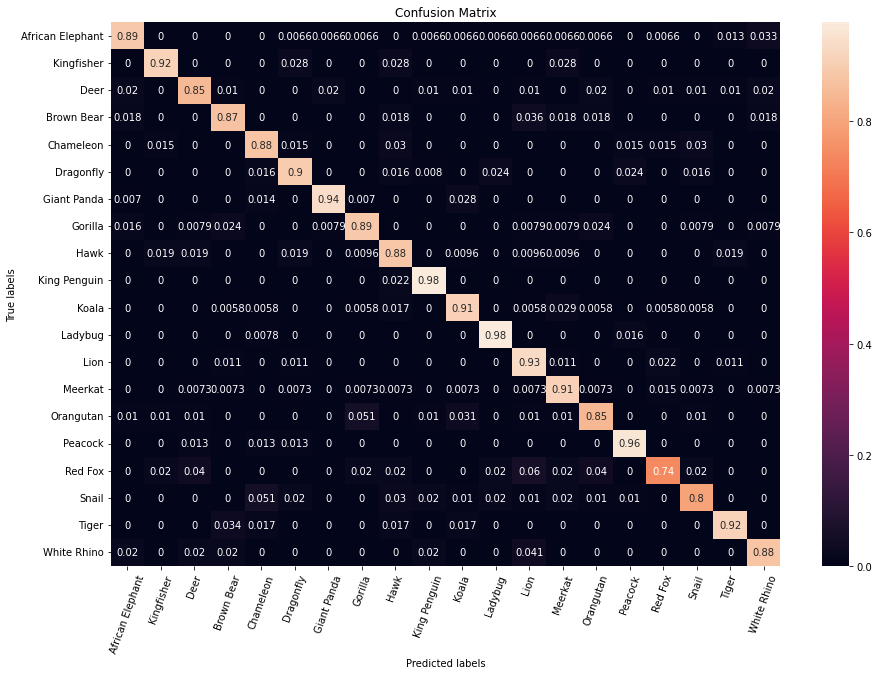

Predicted label ['Hawk' 'Hawk']
True label ['Snail' 'Snail']
Corresponding images are shown below


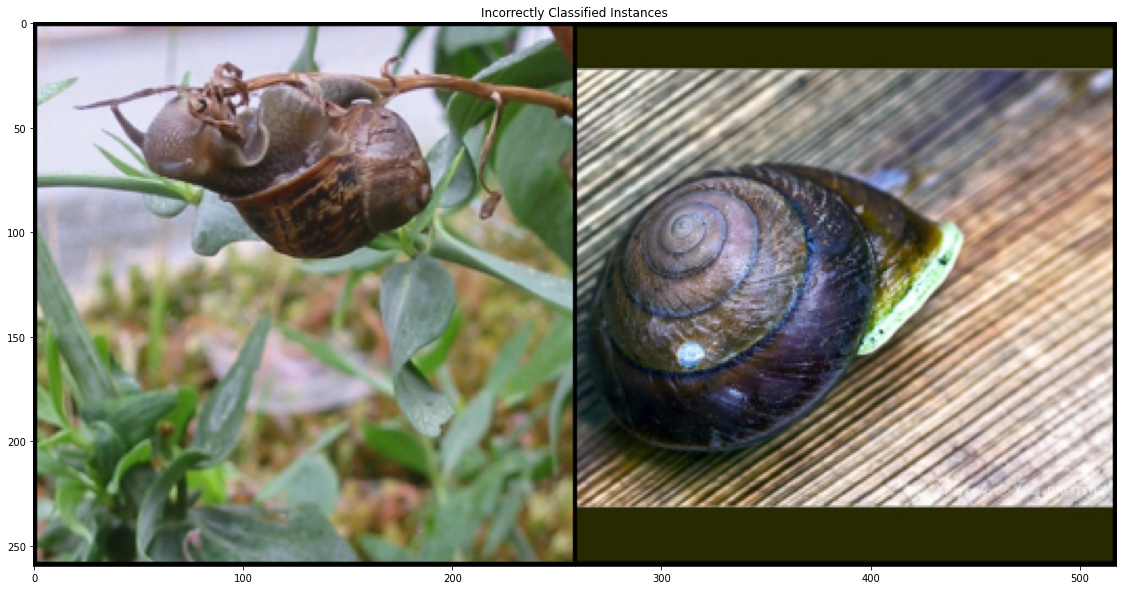

In [145]:
# define and train the network
model = MyResNet()

# learning_rates = [0.0001, 0.001, 0.002, 0.005]
# weight_decays = [1e-7, 1e-6, 1e-4]
# milestone_options = [[4,7,8],[4,7,8,9],[6,7,8,9],[7,8,9]]
# gammas = [0.2, 0.3, 0.4, 0.6]

# Changed learning rate to 0.001 and added a learning rate scheduler.
optimizer = optim.Adamax(model.parameters(), lr=0.001, weight_decay=1e-7)
scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=[7,8,9], gamma=0.4)


params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print("Total number of parameters is: {}".format(params))

# Flag to get info for plotting.
get_info = False

val_accuracies, losses = train_part(model, optimizer, scheduler, epochs = 10, info=get_info)

# report test set accuracy
check_accuracy(loader_val, model, analysis=True)


# save the model
torch.save(model.state_dict(), 'model.pt')

In [153]:
torch.save(model.state_dict(), 'model.pt')

Got 1798 / 1998 correct of val set (89.99)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


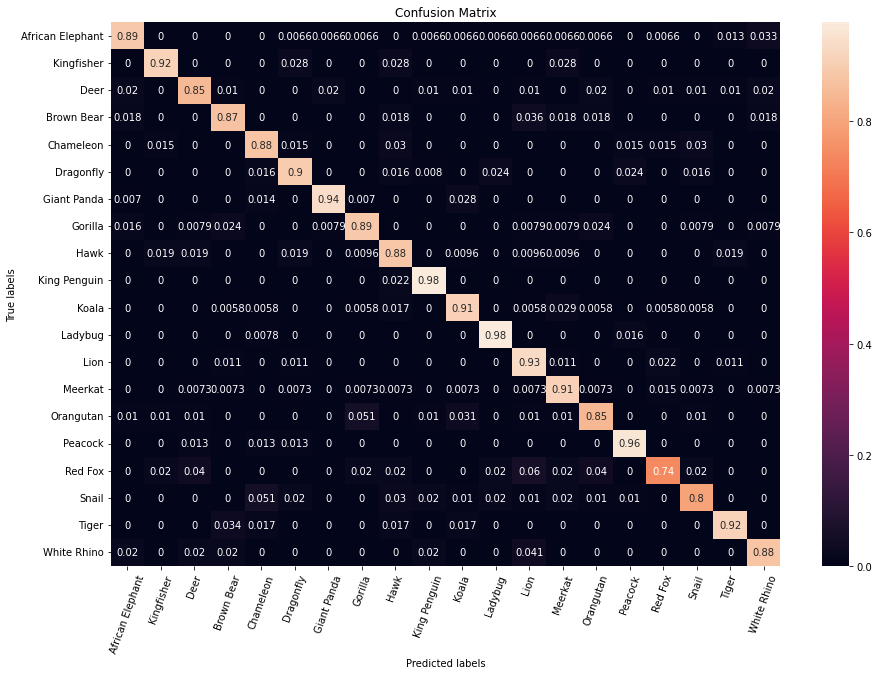

Predicted label ['Deer']
True label ['Hawk']
Corresponding images are shown below


(0.8998998998998999,
 tensor([13., 13., 13.,  ..., 13.,  8.,  1.], device='cuda:0'),
 tensor([14., 13., 10.,  ..., 13.,  8.,  1.], device='cuda:0'))

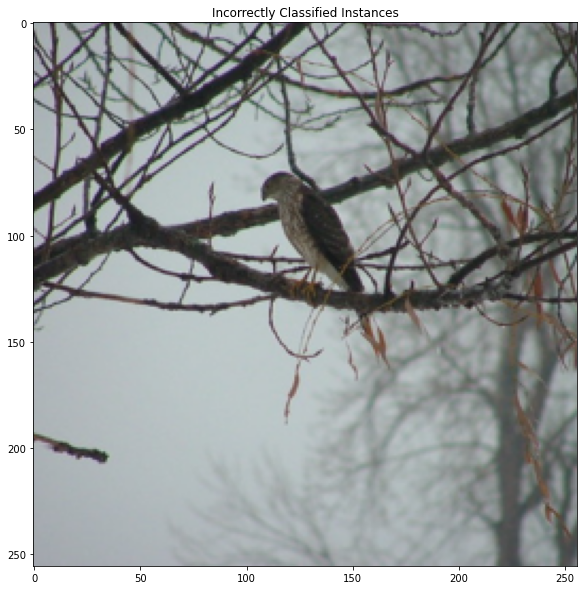

In [147]:
check_accuracy(loader_val, model, analysis=True)

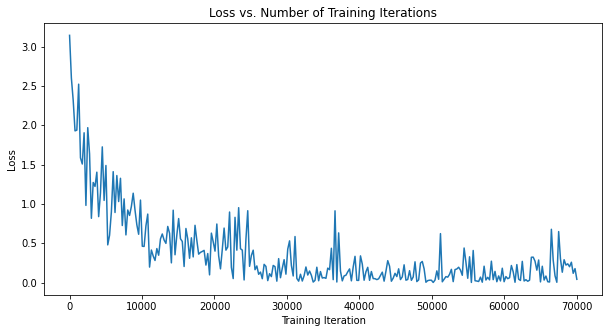

In [60]:
import matplotlib.pyplot as plt

if get_info:
    iterations = np.linspace(0, info_every*len(losses), len(losses))

    plt.figure(figsize=(10, 5))
    plt.title("Loss vs. Number of Training Iterations")
    plt.xlabel("Training Iteration")
    plt.ylabel("Loss")
    plt.plot(iterations, losses)
    plt.show()


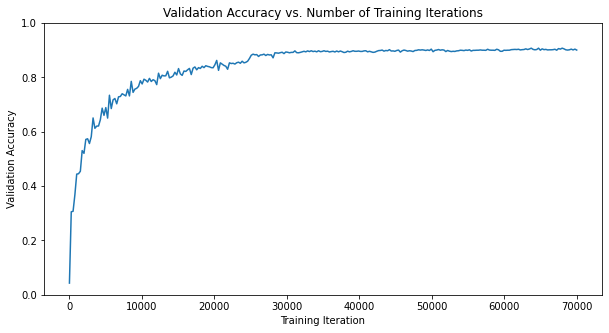

In [59]:
if get_info:
    iterations = np.linspace(0, info_every*len(losses), len(losses))

    plt.figure(figsize=(10, 5))
    plt.title("Validation Accuracy vs. Number of Training Iterations")
    plt.xlabel("Training Iteration")
    plt.ylabel("Validation Accuracy")
    plt.ylim(0, 1)
    plt.plot(iterations, val_accuracies)
    plt.show()

---

<!-- BEGIN QUESTION -->

### Network Performance

Run the code below when all engineering decisions have been made, do not overfit to the test set!

**Note that** this will appear in the output, and be checked by markers (so ensure it is present in the auto-export)

Got 1784 / 2000 correct of val set (89.20)
check acc <class 'torch.Tensor'> <class 'torch.Tensor'>


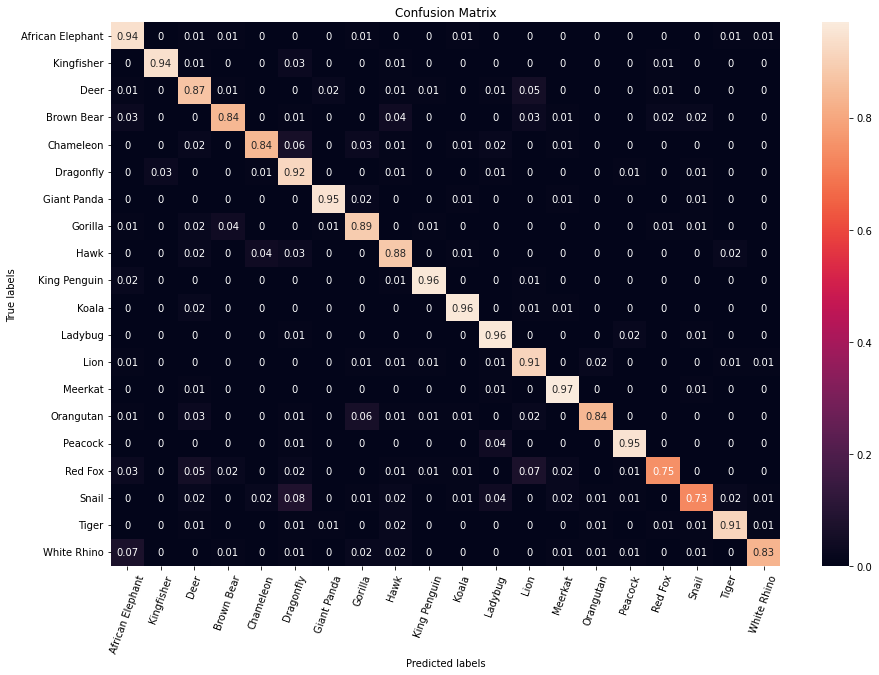

Predicted label ['Dragonfly']
True label ['Chameleon']
Corresponding images are shown below


(0.892,
 tensor([13., 14.,  9.,  ..., 13.,  4.,  8.], device='cuda:0'),
 tensor([13., 14.,  9.,  ..., 13.,  4.,  8.], device='cuda:0'))

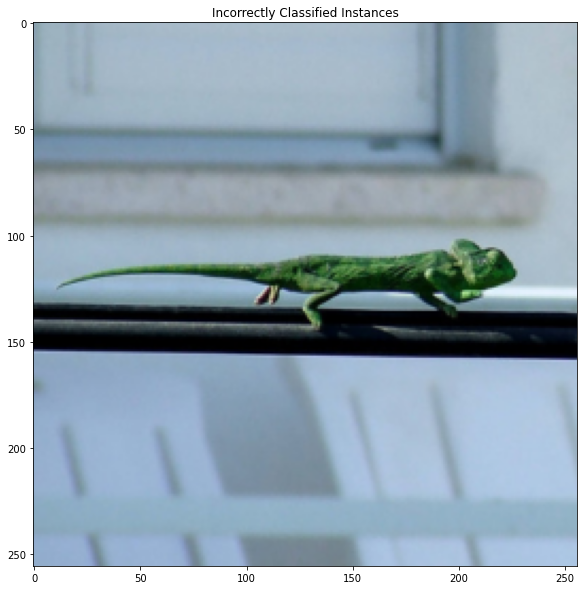

In [148]:
# Run once your have trained your final model
check_accuracy(loader_test, model, analysis=True)

In [149]:
# Further performance analysis.
from sklearn.metrics import precision_recall_fscore_support
acc, predictions, targets = check_accuracy(loader_test, model)
precision, recall, f1score, _ = precision_recall_fscore_support(targets.cpu(), predictions.cpu(), average='macro')

# Print result.
print("Precision:" + str(precision))
print("Recall:" + str(recall))
print("F1-score:" + str(f1score))

Got 1784 / 2000 correct of val set (89.20)
Precision:0.8959924223634983
Recall:0.8919999999999998
F1-score:0.8916855478717347


___

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.1: Hyperparameter Search:
Given such a network with a large number of trainable parameters, and a training set of a large number of data, what do you think is the best strategy for hyperparameter searching? (3 points)

**Answer:**

The large size of both the number of trainable parameters and the training set, causes training the model to be computationally expensive and time inefficient. Therefore, when hyperparameter tuning, a lot of time has to be taken to evaluate the performance of the model for each set of hyperparameters. This means that a good hyperparameter search strategy is important because the search space is extremely large. For this reason, performing a brute force hyperparameter search, such as grid search, would be too time inefficient even though it would ensure the most optimal hyperparameters are found.

Opting for a random search would allow us to randomly search the hyperparameter space selecting the best results found, doing so we could look at a subset of the full search space and reduce the time taken during tuning. Although this approach reduces the amount of time spent searching the hyperparameter space, it is unlikely to find the most optimal hyperparameters. Bayesian optimisation is another approach which could be used that uses the results of previous evaluations during the search process, this works by treating the hyperparameter optimisation as an unknown function and placing a probability distribution over it estimated using previous observations. Using this method, when compared to random search, should find hyperparameters which are more optimal in a shorter amount of time, thus this is probably the best approach to use when tackling hyperparameter optimisation in a case like this. However using this approach comes with the same drawback as random search such that the most optimal hyperparameters may not be found.

Alternatively, the hyperparameter search could be done using trial and error. This would involve testing multiple combinations of hyperparameters whilst applying knowledge of how they effect the performance of the model to help tune them in right direction. This approach is not effecient if looking to find the most optimal hyperparameters, however satisfactory results can be achieved.

In practice, above we have used a method of trial and error whilst applying knowledge of neural network behaviour for hyperparameter tuning and engineering decisions to produce satisfactory results under the time constraints.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q2.2: Engineering Decisions 

Detail which engineering decisions you made to boost the performance of the baseline results. Why do you think that they helped? (7 points)

**Answer:**

##### Architecture

The network architechture was adjusted from the baseline model. The change made was inspired by the ResNet-18 from [1], to make this change the first two resnet block layers, which had in-channels of 16 and 32 respectively, were removed, whilst increasing the outchannels of the initial convolutional layer to 64. Additionally, after the first convolutional layer maxpooling was added and after the final residual block average pooling is performed, these two layers were both experimented with, however no improvement was found. A pooling layer has to be added after the first convolution in order to downsample the input size for the next layer.

We see an improvement in performance when increasing the outchannels of the initial convolutional layer, these channels are subsequently passed to the first residual block layer. The reason for this is that each channel outputted by the convolution captures different small features within the input image. When this is initially set to 16 this constrains the number of small features which are detected and then passed on through the network. However, within our dataset there is such diversity, even within smaller features, that increasing the number of channels outputted by the first convolution provides later layers of the network with more information. Thus this improved performance of the model.

Increasing the number of residual blocks within each layer was experimented with however this increased the number of trainable parameters in the network with no sign of increased validation performance. It is possible that more epochs or data would be required to increase the performance of a deeper network.

##### Data Augmentation

The training dataset size was increased using augmented versions of the original dataset. By adding additional augmented data in this way and increasing the size of the training set we are providing the model with additional training instances and enriching the quality of the training set. Diversifying the training set in this way improves the robustness of the model and improves performance on unseen data.

The augmentations which have been applied in our case are random resized crops of the images, horizontal flips and random rotations. When selecting the augmentations it was important to choose ones which felt most appropriate for the classification task, therefore scaling and orientation were selected because adjusting these aspects of the images would simulate what unseen data could be like.

Initially the dataset was doubled in size and only one of these three augmentations was applied randomly to each image in the dataset. This saw a marked improvement on validation performance. However, with further experimentation it was noticed that performing the random resized crop on all of the data and then additionally performing a second set of data augmentation with either randomly flipping horizontally or rotatating the images, thus tripling the size of the original dataset, saw a futher increase in validation accuracy. This approach was taken in the final engineering decision.

##### Learning Rate and Scheduler

Another engineering decision which produced improved validation accuracy was adjusting the learning rate. In addition to the learning rate value of 0.001 found during hyperparameter tuning a learning rate scheduler was added using the `MultiStepLR` scheduler from PyTorch. This allowed us to step down the learning rate, by a factor gamma, at predefined epochs. The justification for doing this is that further into the training sequence a lower learning rate means that the network parameters can move in smaller steps in order to converge closer to the optimal model and minimise the loss further. Introducing the scheduler increased the size of the hyperparameter space by adding the choice of which epochs to step the learning rate and which gamma value use. It was found that stepping the learning rate on the 8th 9th and 10th epochs made the best improvements and the gamma value was tuned to 0.4.

##### Optimiser

Another aspect of the model training process is selecting the best optimiser. In this case the AdamMax optimiser was selected as it appeared to produce the best results. Other optimisers which were tried included Adam and AdamW. In addition to this, each of these variants of the Adam optimiser take a `weight_decay` argument which outlines the L2 penalty applied to the loss function. Adjusting this hyperparameter was experimented with however it was found that the value originally included in the baseline model produced the highest validation accuracy.

##### Batch Size

The batch size was reduced to 16 which saw an increase in validation accuracy of the model. This could be because the network includes batch norm layers, within these layers the batch is normalised with respect to its mean and variance. When the batchsize is decreased this mean and variance is more biased towards the values within the smaller batch and thus more noise is introduced into the training data. This introduction of noise acts as regularisation and is likely the reason for the improved validation accuracy of the model. The addition of this noise also means that no dropout is required within the network.

##### Epochs

During the final stage of engineering we looked at the validation accuracy and training loss across 20 epochs and the results are plotted above. The resulting plots show that the improvement on validation accuracy plateaus after around 10 epochs and after which not much of an increase in accuracy is seen. Therefore it was concluded that it is sufficient to train the model for 10 epochs.

##### References:
[1] "Deep Residual Learning for Image Recognition", Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun (2015).

---

<!-- END QUESTION -->

## Part 3 (10 points)

The code provided below will allow you to visualise the feature maps computed by different layers of your network. Run the code (install matplotlib if necessary) and **answer the following questions*(: 

<!-- BEGIN QUESTION -->

### Q3.1 : Learned Features

Compare the feature maps from low-level layers to high-level layers, what do you observe? (4 points)

**Answer:**

From these feature maps we notice that the lower level layers, such as the first convolutional layer and layer 1, are higher resolution images. Areas of these feature maps which have higher pixel values highlight small simple features such as edges and small shapes, this is particularly clear with the first convolutional layer which shows some feature maps which appear to highlight the edges within the image.

As we move further through the network to deeper layers we notice that the resolution of these feature maps decreases, this is because each convolution throughout the network downsamples the input image using a stride of 2. As the images are downsampled and passed through the network the feature maps found in the later layers correspond to more complex features made up of the smaller more simple features detected in the shallower layers. Therefore, when a pixel value in a feature map associated with a deeper layer has a higher value this is associated with the input image including a better match to a corresponding complex feature. For example when an area of a high level feature map is highlighted this may correspond to a more complex feature such as the shape of a penguin wing being included in the image.

The size and complexity of the features detected corresponding to the feature maps increases as we move from low-level to high-level layers within the network.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.2: Performance Analysis

Use the training log, reported test set accuracy and the feature maps, analyse the performance of your network. If you think the performance is sufficiently good, explain why; if not, what might be the problem and how can you improve the performance? (4 points)

**Answer:**

The final validation accuracy achieved by the model was 89.99% and the test accuracy was 89.20% after 10 epochs, this points to a sufficiently good level of accuracy. The plots of validation accuracy and loss over training iterations (20 epochs) allow us to visualise the training log output more easily. When inspecting these plots we notice that the training loss consistenetly decreases across the iterations for 10 epochs. There is a noticeable amount of variation in loss between batches but this is partly due to the small batch size which results in high variance in accuracy of classification from batch to batch whilst training. This general trend of decreasing loss shows that the model is continually learning well across the 10 epochs. Likewise the plot of validation error shows a continual increase across 10 epochs and shows no points of decrease meaning the model is not overfitting to the training data. This is further supported by the fact that the test accuracy is only slightly lower than the validation accuracy meaning that the model is generalising well to unseen data.
Additionally, the feature maps show that the model is learning to detect small features within the image and pass these through the network in order to detect more complex features.

Although the performance is quite high there could be improvements made which would increase the performance of the model. For example further experimentation could be done with the hyperparameters by implementing a Bayesian optimisation algorithm which would more efficiently find more optimal hyperparameters for the model. Additionally, the architechture of the model could be adapted further, for example adding more layers within each residual block, adapting the structure of a block, increasing the number of blocks within the network.

Increasing the size of the training dataset would also be beneficial because the model would have more data to train on and therfore be more robust to unseen data. This could also include performing more types of transformations to the data and adding this to the training set.

Other improvements which could be made might come from changing activation functions within the network or using different loss functions, these weren't experimented with at this point.

---

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Q3.3: Alternative Evaluations

What are the other possible ways to analyse the performance of your network? (2 points)

**Answer:**

In addition to the training log, validation accuracy, test accuracy and feature maps we can look at a number of scores such as precision, recall and F1 score. These have been calculated above and all produce similar values of around 0.89. The precision tells us, out of the classifications given by the model, what proportion of these are correct on average across the classes. Whereas recall tells us the average proportion of each class in the test set which was correctly predicted. A model which performs well should have both high precision and recall, F1 score is a metric which combines both. In this case the high F1 score means that the model has a good balance between precision and recall.

Additionally, we can look at the confusion matrix outputted and see if there are specific animals which are always being classified incorrectly. For example in the above confusion matrix we can see that both red fox and snail are misclassified the most with around 75% correct classifications, significantly lower than the overall accuracy of the model. This provides us with information on a class by class basis and tells how well the model will perform when required to classify a certain animal.

---

<!-- END QUESTION -->

**Feature Visualization**

The code below will visualize the features of your network layers (you may need to modify the layer names if you made changes to your architecture). 

If you change the plotting code, please ensure it still exports correctly when running the submission cell.

In [150]:
import matplotlib.pyplot as plt

def plot_model_features():
    fig = plt.tight_layout()
    activation = {}
    def get_activation(name):
        def hook(model, input, output):
            activation[name] = output.detach()
        return hook
    vis_labels = ['conv1', 'layer1', 'layer2', 'layer3', 'layer4']

    for l in vis_labels:
        getattr(model, l).register_forward_hook(get_activation(l))
        

    data, _ = test_dataset[999]
    data = data.unsqueeze_(0).to(device = device, dtype = dtype)
    output = model(data)

    for idx, l in enumerate(vis_labels):
        act = activation[l].squeeze()

        # only showing the first 16 channels
        ncols, nrows = 8, 2
        
        fig, axarr = plt.subplots(nrows, ncols, figsize=(15,5))
        fig.suptitle(l)

        count = 0
        for i in range(nrows):
            for j in range(ncols):
                axarr[i, j].imshow(act[count].cpu())
                axarr[i, j].axis('off')
                count += 1

<!-- BEGIN QUESTION -->



<Figure size 432x288 with 0 Axes>

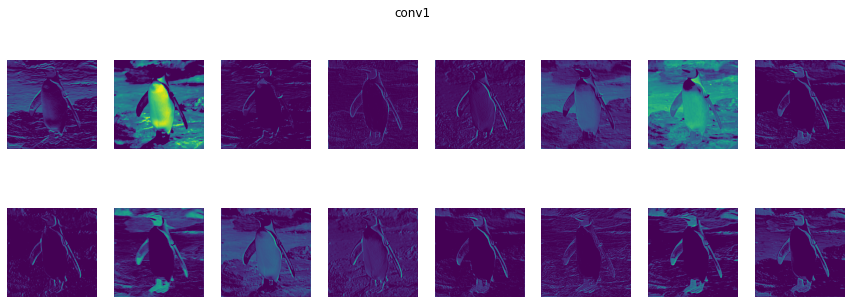

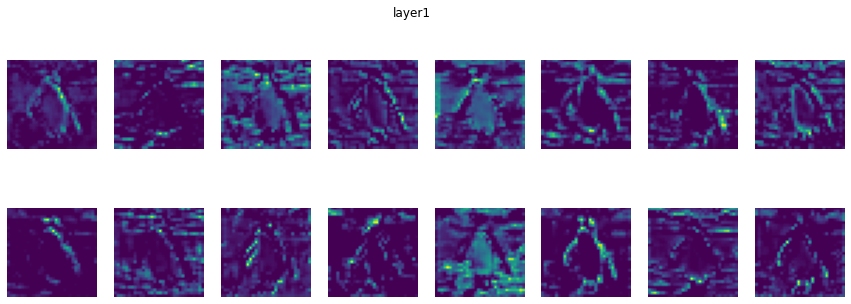

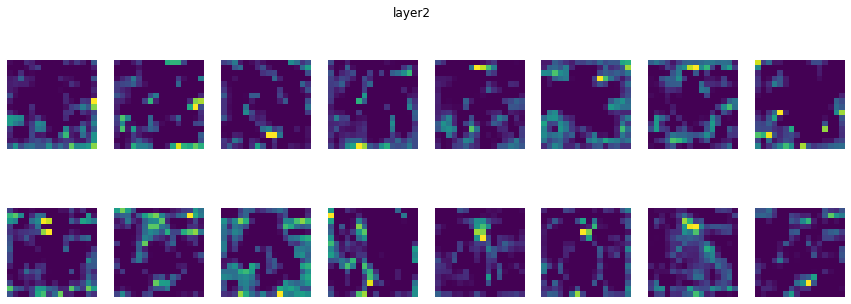

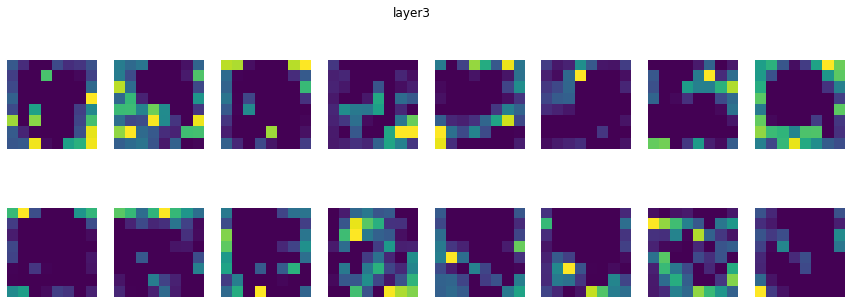

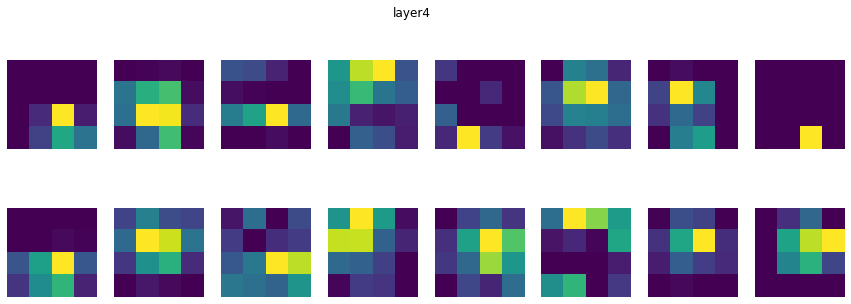

In [151]:
# Visualize the figure here, so it is exported nicely
plot_model_features()  

<!-- END QUESTION -->

## Submission
Git push your finalized version of this notebook (with saved outputs) to the gitlab repo which you were assigned. You should request our tests once and check that the ```preview.pdf```:
* Passes all public tests (these are the same ones provided / embedded in the notebook itself)
* Contains your qualitative answers
* Contains your figures (confusion matrix and network features)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [33]:
grader.check_all()

BatchNorm Layer results: All test cases passed!
BatchNorm Layer - 1 message: Shape Test Passed
BatchNorm Layer - 2 message: Type Test Passed
BatchNorm Layer - 3 message: Param Name Test Passed
BatchNorm Layer - 4 message: Param Shape Test Passed

Convolution Layer results: All test cases passed!
Convolution Layer - 1 message: Shape Test Passed
Convolution Layer - 2 message: Type Test Passed
Convolution Layer - 3 message: Param Name Test Passed
Convolution Layer - 4 message: Param Shape Test Passed

Linear Layer results: All test cases passed!
Linear Layer - 1 message: Shape Test Passed
Linear Layer - 2 message: Type Test Passed
Linear Layer - 3 message: Param Name Test Passed
Linear Layer - 4 message: Param Shape Test Passed

MaxPool Layer results: All test cases passed!
MaxPool Layer - 1 message: Shape Test Passed
MaxPool Layer - 2 message: Type Test Passed